Dans ce projet j'étudie différents models de machine learning pour prédire l'état frauduleux ou non de certaines entreprises.




In [ ]:
import pandas as pd
import numpy as np
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score,classification_report,roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv("audit_data.csv")

In [ ]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [ ]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)

In [ ]:
cols_del=['LOCATION_ID','TOTAL']

df.drop(cols_del, axis=1, inplace=True)

In [ ]:
df.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

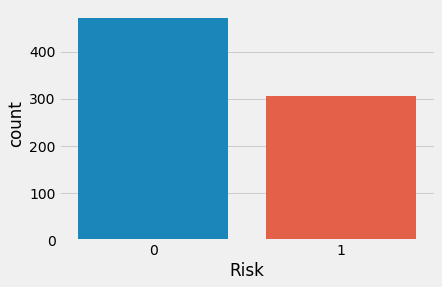

In [ ]:
sns.countplot(df['Risk'], label = "Count") 

In [ ]:
x=df.drop(['Risk'],axis=1)

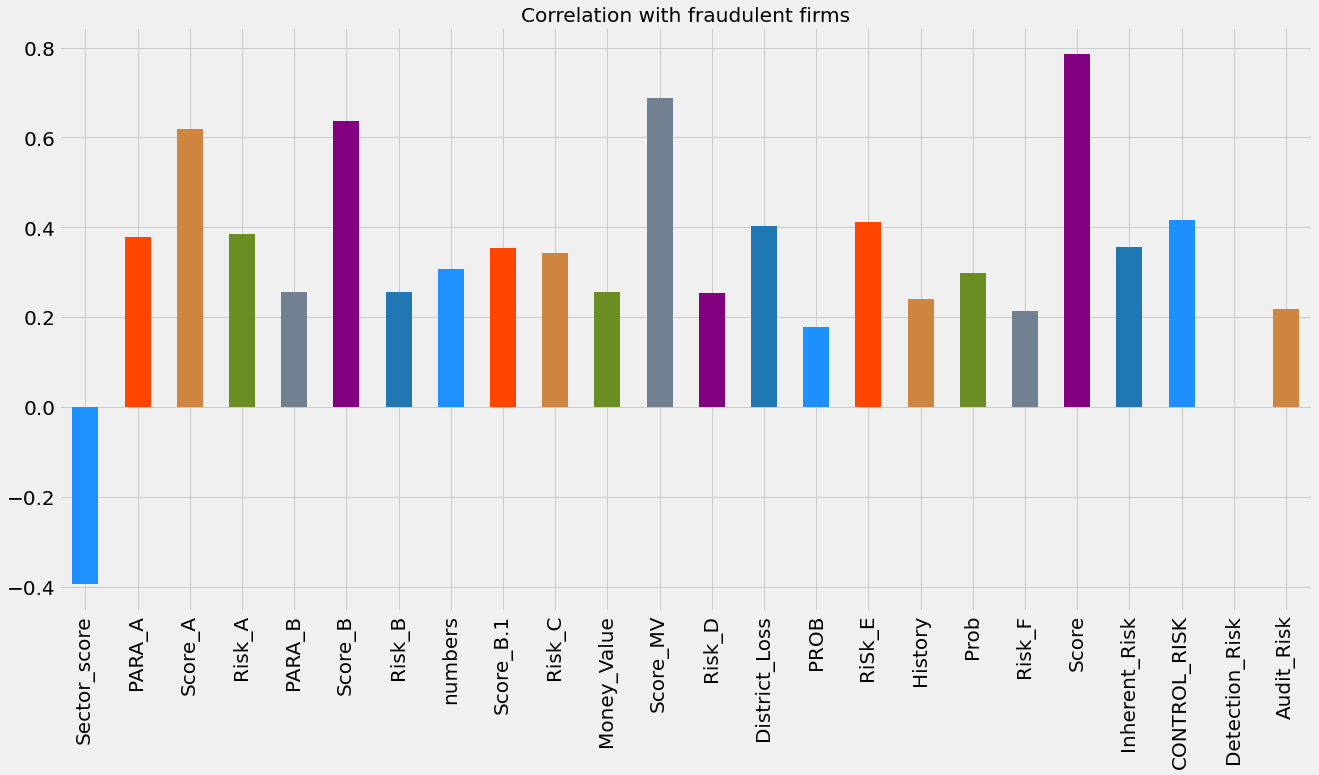

In [ ]:
x.corrwith(df.Risk).plot.bar(
        figsize = (20, 10), title = "Correlation with fraudulent firms", fontsize = 20,
        rot = 90 , color=['dodgerblue', 'orangered', 'peru', 'olivedrab', 'slategrey','purple','tab:blue'] , grid = True)

In [ ]:
x.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


In [ ]:
x=x.drop(['Detection_Risk'],axis=1)

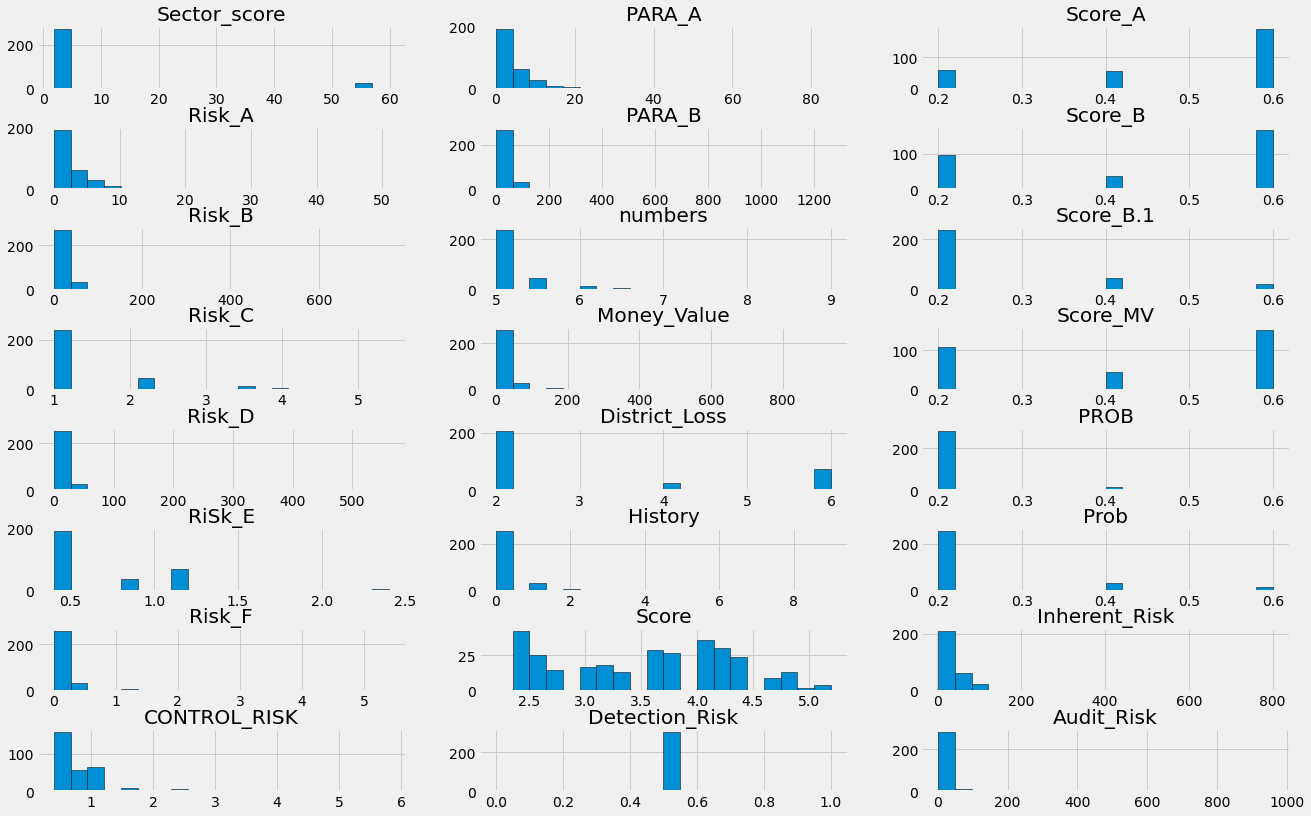

In [ ]:
df1=df[df['Risk']==1]
columns=df1.columns[:24]
plt.subplots(figsize=(20,20))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.6)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [ ]:
y=df['Risk']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y, random_state = 123)

In [ ]:
sc_x = StandardScaler()
x_train = pd.DataFrame(sc_x.fit_transform(x_train))
x_test_scaled = pd.DataFrame(sc_x.transform(x_test))

# Logistic Regression

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9903225806451612

In [ ]:
y_predict_logi = logi.predict(x_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.0,0.990323,1.0,1.0,1.0,1.0


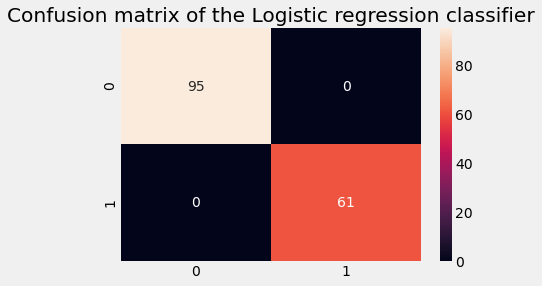

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic regression classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

# Random Forest

In [ ]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [ ]:
acc_rande = cross_val_score(estimator = random_forest_e, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

0.9983870967741936

In [ ]:
y_predict_r = random_forest_e.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.0,0.990323,1.0,1.0,1.0,1.0
1,Random Forest,1.0,0.998387,1.0,1.0,1.0,1.0


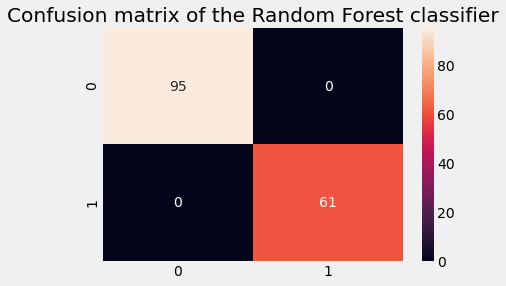

In [ ]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

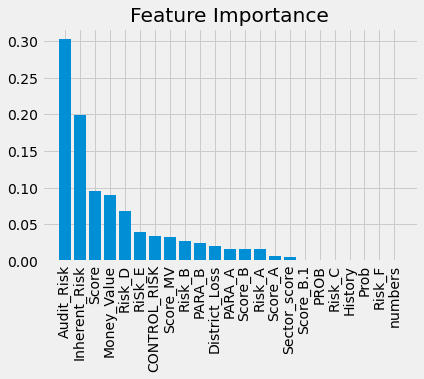

In [ ]:
importances = random_forest_e.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x.columns[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show()

# KNeighbors classifier

In [ ]:
k=4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
acc_knn = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_knn.mean()

0.9693548387096775

In [ ]:
y_predict_r = knn.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['KNeighbors',acc, acc_knn.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.00000,0.990323,1.0,1.000000,1.000000,1.000000
1,Random Forest,1.00000,0.998387,1.0,1.000000,1.000000,1.000000
2,KNeighbors,0.99359,0.969355,1.0,0.983607,0.991736,0.991803


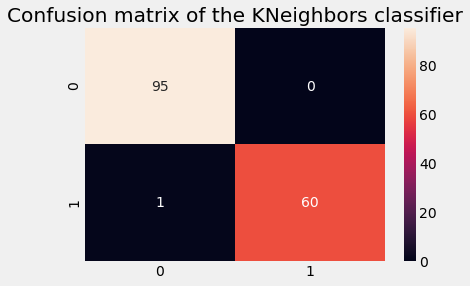

In [ ]:
cm_knn = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the KNeighbors classifier')
sns.heatmap(cm_knn,annot=True,fmt="d")
plt.show()

# Decision Tree



In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
acc_dtc = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_dtc.mean()

1.0

In [ ]:
y_predict_r = dtc.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Decision tree',acc, acc_dtc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.00000,0.990323,1.0,1.000000,1.000000,1.000000
1,Random Forest,1.00000,0.998387,1.0,1.000000,1.000000,1.000000
2,KNeighbors,0.99359,0.969355,1.0,0.983607,0.991736,0.991803
3,Decision tree,1.00000,1.000000,1.0,1.000000,1.000000,1.000000


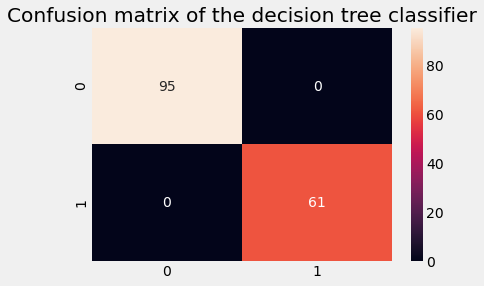

In [ ]:
cm_dtc = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the decision tree classifier')
sns.heatmap(cm_dtc,annot=True,fmt="d")
plt.show()

# GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
acc_nb = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_nb.mean()

0.9758064516129032

In [ ]:
y_predict_r = nb.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['GaussianNB',acc, acc_nb.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.000000,0.990323,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.000000,1.000000
2,KNeighbors,0.993590,0.969355,1.000000,0.983607,0.991736,0.991803
3,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980769,0.975806,0.953125,1.000000,0.976000,0.984211


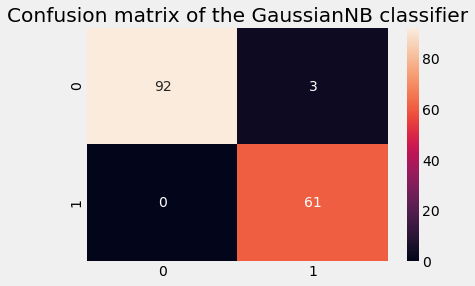

In [ ]:
cm_nb = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the GaussianNB classifier')
sns.heatmap(cm_nb,annot=True,fmt="d")
plt.show()

# SVC

In [ ]:
svc=SVC(random_state=1)
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
acc_svc = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_svc.mean()

0.8709677419354838

In [ ]:
y_predict_r = svc.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['SVC',acc, acc_svc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.000000,0.990323,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.000000,1.000000
2,KNeighbors,0.993590,0.969355,1.000000,0.983607,0.991736,0.991803
3,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980769,0.975806,0.953125,1.000000,0.976000,0.984211
5,SVC,0.839744,0.870968,1.000000,0.590164,0.742268,0.795082


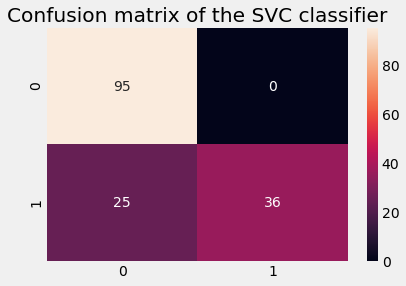

In [ ]:
cm_svc = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the SVC classifier')
sns.heatmap(cm_svc,annot=True,fmt="d")
plt.show()

# GradientBoosting Classifier

In [ ]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=4,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
acc_gfc = cross_val_score(estimator = gfc, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_gfc.mean()

1.0

In [ ]:
y_predict_r = gfc.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['GradientBoosting',acc, acc_gfc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.000000,0.990323,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.000000,1.000000
2,KNeighbors,0.993590,0.969355,1.000000,0.983607,0.991736,0.991803
3,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980769,0.975806,0.953125,1.000000,0.976000,0.984211
5,SVC,0.839744,0.870968,1.000000,0.590164,0.742268,0.795082
6,GradientBoosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


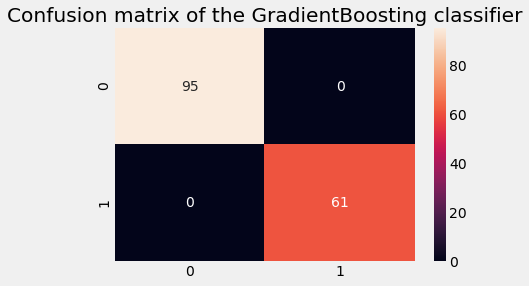

In [ ]:
cm_gfc = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the GradientBoosting classifier')
sns.heatmap(cm_gfc,annot=True,fmt="d")
plt.show()

# AdaBoosting

In [ ]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
acc_abc = cross_val_score(estimator = abc, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_abc.mean()

1.0

In [ ]:
y_predict_r = abc.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['AdaBoosting',acc, acc_abc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.000000,0.990323,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.000000,1.000000
2,KNeighbors,0.993590,0.969355,1.000000,0.983607,0.991736,0.991803
3,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980769,0.975806,0.953125,1.000000,0.976000,0.984211
5,SVC,0.839744,0.870968,1.000000,0.590164,0.742268,0.795082
6,GradientBoosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,AdaBoosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


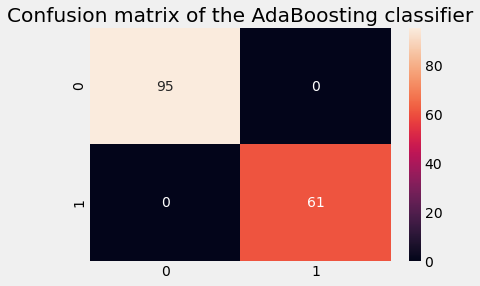

In [ ]:
cm_abc = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the AdaBoosting classifier')
sns.heatmap(cm_abc,annot=True,fmt="d")
plt.show()

# MLPClassifier

In [ ]:
mlp=MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
acc_mlp = cross_val_score(estimator = mlp, X = x_train, y = y_train, cv = kfold, scoring=scoring)
acc_mlp.mean()

0.9919354838709676

In [ ]:
y_predict_r = mlp.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['MLP',acc, acc_mlp.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,1.000000,0.990323,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,0.998387,1.000000,1.000000,1.000000,1.000000
2,KNeighbors,0.993590,0.969355,1.000000,0.983607,0.991736,0.991803
3,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980769,0.975806,0.953125,1.000000,0.976000,0.984211
5,SVC,0.839744,0.870968,1.000000,0.590164,0.742268,0.795082
6,GradientBoosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,AdaBoosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,MLP,1.000000,0.991935,1.000000,1.000000,1.000000,1.000000


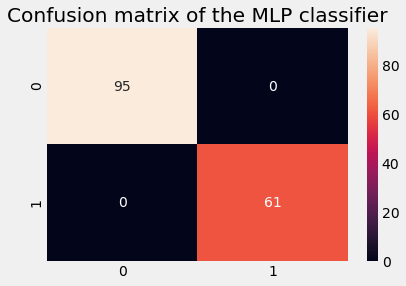

In [ ]:
cm_mlp = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the MLP classifier')
sns.heatmap(cm_mlp,annot=True,fmt="d")
plt.show()

# ROC Curve

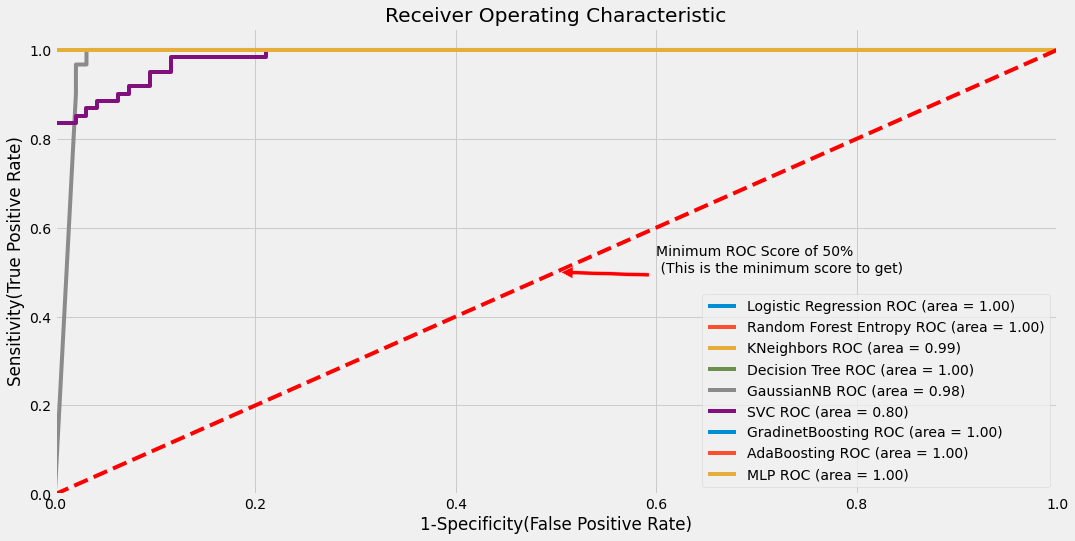

In [ ]:
plt.figure(figsize=(16,8))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},
    {
    'label': 'Random Forest Entropy',
    'model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47),
},    
    {
    'label': 'KNeighbors',
    'model':  KNeighborsClassifier(n_neighbors = 4),
},

    {
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
        {
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
      {
    'label': 'SVC',
    'model':  SVC(random_state=1, probability=True),
},
      {
    'label': 'GradinetBoosting',
    'model':  GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5),
},

     {
    'label': 'AdaBoosting',
    'model':  AdaBoostClassifier(n_estimators=100, random_state=0),
},
    {
    'label': 'MLP',
    'model': MLPClassifier(alpha=1, max_iter=1000),
},

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.5),
                arrowprops=dict(facecolor='red', shrink=0.05),
                )
plt.legend(loc="lower right")
plt.show()